#### Proyek Analis Data : Air Quality Dataset
- Nama : Andi Fiqri Aulia Artsam
- email : fiqartsam@gmail.com
- Id Dicoding : andiartsam

##### Menentukkan Pertanyaan Bisnis
- Pertanyaan 1 : Bagaimana tingkat kelembapan, suhu, dan curah hujan bulanan di Kawasan Beijing dalam kurun waktu 5 tahun?
- Pertanyaan 2 : Stasiun manakah yang menunjukkan tingkat polusi udara yang paling tinggi dalam kurun waktu 5 tahun?

##### Catatan Kaki

| Variabel            | Satuan* |
| ------------------- | :-----: |
| PM 2.5*             | µg/m³   |
| PM 10**             | µg/m³   |
| SO<sub>2</sub>      | µg/m³   |
| NO<sub>2</sub>      | µg/m³   |
| CO                  | mg/m³   |
| O<sub>3</sub>       | µg/m³   |
| Temperature (TEMP)  | °C      |
| Pressure (PRESS)    | hPa     |
| Dew point (DEWP)    | °C      |
| Rainfall (Rain)     | mm      |
| Wind Speed (wspm)   | m/s     |


###### *Particulate Matter dengan diameter berkisar 2.5 mm<br>
###### **Particulate Matter dengan diameter berkisar 10 mm


#### Persiapan Seluruh Library yang diperlukan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

#### Data Wrangling

#### Gathering Data

Mengonversi Data CSV

In [2]:
# Konversi seluruh data tipe CSV ke Data Frame

aot_df = pd.read_csv('./data/Aotizhongxin.csv', delimiter=',')
cha_df = pd.read_csv('./data/Changping.csv', delimiter=',')
din_df = pd.read_csv('./data/Dingling.csv', delimiter=',')
don_df = pd.read_csv('./data/Dongsi.csv', delimiter=',')
gua_df = pd.read_csv('./data/Guanyuan.csv', delimiter=',')
guc_df = pd.read_csv('./data/Gucheng.csv', delimiter=',')
hua_df = pd.read_csv('./data/Huairou.csv', delimiter=',')
non_df = pd.read_csv('./data/Nongzhanguan.csv', delimiter=',')
shu_df = pd.read_csv('./data/Shuny.csv', delimiter=',')
tia_df = pd.read_csv('./data/Tiantan.csv', delimiter=',')
wanl_df = pd.read_csv('./data/Wanliu.csv', delimiter=',')
wans_df = pd.read_csv('./data/Wanshouxigong.csv', delimiter=',')


Menggabungkan seluruh dataframe menjadi satu dataframe karena seluruh stasiun berada dalam satu kawasan Beijing, Tiongkok.

In [3]:
all_df = pd.concat([aot_df, cha_df, din_df, don_df, gua_df, guc_df, hua_df, non_df, shu_df, tia_df, wanl_df, wans_df])
all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
all_df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


Data dihimpun dari 1/3/2013 s.d. 28/2/2017

#### Assesing Data

In [5]:
all_df.info()
all_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


Pemeriksaan kelengkapan data harian 24 jam tiap stasiun

In [6]:
# Data ekspektasi yang dihimpun dimulai 2013/3/1 s.d. 2017/2/28 dengan bantuan library pandas
isExpected_dates = pd.date_range(start='2013-03-01', end='2017-02-28 23:00:00', freq='H') #freq ='H' -> dalam 24 jam
print('Jumlah data seharusnya:', len(isExpected_dates))

Jumlah data seharusnya: 35064


In [7]:
# Data aktual yang dihimpun oleh tiap stasiun
difference_dates = all_df['station'].value_counts().mean() - len(isExpected_dates)
print('Selisih data:', difference_dates)
all_df['station'].value_counts()

Selisih data: 0.0


station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64

Pengecekan data duplikat, *missing value*, *innacurate*

In [8]:
print("Jumlah Duplikasi:", all_df.duplicated().sum())
print(f'Jumlah Missing Value:\n{all_df.isna().sum()}')

Jumlah Duplikasi: 0
Jumlah Missing Value:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [9]:
all_df[all_df.isna().any(axis=1)]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
74,75,2013,3,4,2,34.0,62.0,NaN,14.0000,300.0,68.0,8.1,1016.7,-11.8,0.0,N,4.3,Aotizhongxin
75,76,2013,3,4,3,12.0,34.0,6.0000,12.0000,NaN,77.0,7.2,1016.9,-11.6,0.0,N,2.8,Aotizhongxin
76,77,2013,3,4,4,7.0,18.0,14.0000,NaN,400.0,42.0,6.0,1018.0,-11.6,0.0,NNW,1.0,Aotizhongxin
124,125,2013,3,6,4,192.0,203.0,83.6808,140.4252,NaN,22.0,3.9,1007.3,-6.1,0.0,NE,1.4,Aotizhongxin
170,171,2013,3,8,2,339.0,400.0,NaN,162.0000,3899.0,84.0,2.5,998.2,-1.9,0.0,SW,0.8,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35028,35029,2017,2,27,12,NaN,NaN,NaN,NaN,NaN,NaN,12.1,1017.3,-5.4,0.0,SSW,1.2,Wanshouxigong
35029,35030,2017,2,27,13,NaN,NaN,NaN,NaN,NaN,NaN,14.0,1015.8,-5.2,0.0,SSE,1.8,Wanshouxigong
35054,35055,2017,2,28,14,3.0,6.0,NaN,5.0000,NaN,82.0,14.6,1013.3,-15.6,0.0,N,3.6,Wanshouxigong
35055,35056,2017,2,28,15,11.0,21.0,2.0000,5.0000,200.0,NaN,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong


#### Cleaning Data

Menghapus kolom **No** karena sudah terwakili oleh index, serta menghapus kolom **PRES**, **wd**, dan **WSPM** karena tidak diperlukan pada pertanyaan bisnis yang diajukan.

In [10]:
all_df.drop(columns= ['No', 'PRES', 'wd', 'WSPM'], inplace=True)
all_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,0.0,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,0.0,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,0.0,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,0.0,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,0.0,Aotizhongxin


Mengonversi kolom **year**, **month**, **day**, dan **hour** menjadi tipe data datetime

In [11]:
datetimeCol = ['year', 'month', 'day', 'hour']

all_df['DateTime'] = pd.to_datetime(all_df[datetimeCol])
all_df.insert(0, 'DateTime', all_df.pop('DateTime')) # Mengubah posisi kolom DateTime berada di paling kiri
all_df.drop(columns= datetimeCol, inplace=True) # Menghapus kolom-kolom yang berkenaan waktu
all_df.head()

,DateTime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,0.0,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,0.0,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,0.0,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,0.0,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,0.0,Aotizhongxin


Mengatasi *Missing Value* dengan *Interpolation* karena *date series* yang digunakan memiliki data lengkap 24 jam.

In [12]:
all_df.isna().sum()

DateTime        0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
DEWP          403
RAIN          390
station         0
dtype: int64

Metode interpolation yang digunakan ialah *time* dengan tujuan untuk mengisi nilai-nilai yang hilang antara dua titik waktu  alam suatu deret waktu.

In [13]:
all_df.set_index('DateTime', inplace=True) # index menyesuaikan urutan kolom 'DateTime' supaya interpolasi dapat dilakukan
bystation_df = all_df.groupby(by='station') # Melakukan interpolasi berdasarkan stasiun
interpolated_data = pd.DataFrame()

for name, group in bystation_df:
    interpolated_group = group.interpolate(method='time')
    interpolated_data = pd.concat([interpolated_data, interpolated_group])

all_df = interpolated_data
all_df.isna().sum()

C:\Users\user1\AppData\Local\Temp\ipykernel_8488\3476750346.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_group = group.interpolate(method='time')
C:\Users\user1\AppData\Local\Temp\ipykernel_8488\3476750346.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_group = group.interpolate(method='time')
C:\Users\user1\AppData\Local\Temp\ipykernel_8488\3476750346.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_group = group.interpolate(method='time')
C:\Users\user1\AppData\Local\Temp\ipykernel_8488\3476750346.py:6: FutureWarning: DataFrame.interpolate with object dtype is 

PM2.5       0
PM10        0
SO2         0
NO2        22
CO          0
O3          0
TEMP        0
DEWP        0
RAIN        0
station     0
dtype: int64

In [14]:
all_df[all_df.isna().any(axis=1)]

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,station
DateTime,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,-19.7,0.0,Dingling
2013-03-01 01:00:00,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,-19.0,0.0,Dingling
2013-03-01 00:00:00,6.0,18.0,5.0,NaN,800.0,88.0,0.1,-18.6,0.0,Gucheng
2013-03-01 01:00:00,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,-19.0,0.0,Gucheng
2013-03-01 02:00:00,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,-19.8,0.0,Gucheng
2013-03-01 03:00:00,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,-21.2,0.0,Gucheng
2013-03-01 04:00:00,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,-21.4,0.0,Gucheng
2013-03-01 05:00:00,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,-21.9,0.0,Gucheng
2013-03-01 06:00:00,3.0,6.0,3.0,NaN,700.0,92.0,-2.6,-20.4,0.0,Gucheng


Sebagaimana diketahui di atas, ternyata kolom **NO2** masih terdapat *Missing Value*, yakni pada stasiun Dingling dan Gucheng. Hal ini mungkin disebabkan adanya kelangkaan data pada suatu waktu dan/atau tidak adanya dua titik baris data diantara data hilang yang mana menyebabkan interpolasi tidak dapat dilakukan. Demikian, perlu dilakukan pemeriksaan pada waktu 24 jam di hari itu, yakni 2013/3/1.

In [15]:
# Dingling
thatday = ('2013-03-01 00:00:00' <= all_df.index) & (all_df.index <= '2013-03-01 23:59:59')
Dingling_in_thatday_df = all_df.loc[ thatday & (all_df['station'] == 'Dingling')]
Dingling_in_thatday_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,station
DateTime,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,-19.7,0.0,Dingling
2013-03-01 01:00:00,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,-19.0,0.0,Dingling
2013-03-01 02:00:00,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,-19.9,0.0,Dingling
2013-03-01 03:00:00,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,-19.1,0.0,Dingling
2013-03-01 04:00:00,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,-19.4,0.0,Dingling
2013-03-01 05:00:00,6.0,6.0,3.0,4.000000,200.0,79.0,-4.5,-19.5,0.0,Dingling
2013-03-01 06:00:00,5.0,10.0,3.0,4.000000,200.0,77.0,-4.5,-19.5,0.0,Dingling
2013-03-01 07:00:00,5.0,6.0,3.0,2.000000,200.0,80.0,-2.1,-20.0,0.0,Dingling
2013-03-01 08:00:00,8.0,7.0,3.0,3.000000,200.0,79.0,-0.2,-20.5,0.0,Dingling


In [16]:
# Gucheng
Gucheng_in_thatday_df = all_df.loc[ thatday & (all_df['station'] == 'Gucheng')]
Gucheng_in_thatday_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,station
DateTime,,,,,,,,,,
2013-03-01 00:00:00,6.0,18.0,5.0,NaN,800.0,88.0,0.1,-18.6,0.0,Gucheng
2013-03-01 01:00:00,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,-19.0,0.0,Gucheng
2013-03-01 02:00:00,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,-19.8,0.0,Gucheng
2013-03-01 03:00:00,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,-21.2,0.0,Gucheng
2013-03-01 04:00:00,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,-21.4,0.0,Gucheng
2013-03-01 05:00:00,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,-21.9,0.0,Gucheng
2013-03-01 06:00:00,3.0,6.0,3.0,NaN,700.0,92.0,-2.6,-20.4,0.0,Gucheng
2013-03-01 07:00:00,5.0,5.0,3.0,NaN,800.0,86.0,-0.9,-20.5,0.0,Gucheng
2013-03-01 08:00:00,5.0,9.0,5.0,NaN,900.0,81.0,0.1,-20.3,0.0,Gucheng


Nilai yang hilang akan digantikan dengan nilai rata-rata pada hari itu melalui metode Imputation.

In [17]:
all_df.fillna(Dingling_in_thatday_df['NO2'].mean(), inplace= True)
Dingling_in_thatday_df = all_df.loc[ thatday & (all_df['station'] == 'Dingling')]
Dingling_in_thatday_df


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,station
DateTime,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,3.0,2.318182,200.0,82.0,-2.3,-19.7,0.0,Dingling
2013-03-01 01:00:00,7.0,7.0,3.0,2.318182,200.0,80.0,-2.5,-19.0,0.0,Dingling
2013-03-01 02:00:00,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,-19.9,0.0,Dingling
2013-03-01 03:00:00,6.0,6.0,3.0,2.666667,200.0,79.0,-3.6,-19.1,0.0,Dingling
2013-03-01 04:00:00,5.0,5.0,3.0,3.333333,200.0,81.0,-3.5,-19.4,0.0,Dingling
2013-03-01 05:00:00,6.0,6.0,3.0,4.000000,200.0,79.0,-4.5,-19.5,0.0,Dingling
2013-03-01 06:00:00,5.0,10.0,3.0,4.000000,200.0,77.0,-4.5,-19.5,0.0,Dingling
2013-03-01 07:00:00,5.0,6.0,3.0,2.000000,200.0,80.0,-2.1,-20.0,0.0,Dingling
2013-03-01 08:00:00,8.0,7.0,3.0,3.000000,200.0,79.0,-0.2,-20.5,0.0,Dingling


In [18]:
all_df.fillna(Gucheng_in_thatday_df['NO2'].mean(), inplace= True)
Gucheng_in_thatday_df = all_df.loc[ thatday & (all_df['station'] == 'Gucheng')]
Gucheng_in_thatday_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,station
DateTime,,,,,,,,,,
2013-03-01 00:00:00,6.0,18.0,5.0,2.318182,800.0,88.0,0.1,-18.6,0.0,Gucheng
2013-03-01 01:00:00,6.0,15.0,5.0,2.318182,800.0,88.0,-0.3,-19.0,0.0,Gucheng
2013-03-01 02:00:00,5.0,18.0,5.5,2.318182,700.0,52.0,-0.7,-19.8,0.0,Gucheng
2013-03-01 03:00:00,6.0,20.0,6.0,2.318182,650.0,62.5,-1.0,-21.2,0.0,Gucheng
2013-03-01 04:00:00,5.0,17.0,5.0,2.318182,600.0,73.0,-1.3,-21.4,0.0,Gucheng
2013-03-01 05:00:00,4.0,11.0,3.0,2.318182,700.0,87.0,-1.8,-21.9,0.0,Gucheng
2013-03-01 06:00:00,3.0,6.0,3.0,2.318182,700.0,92.0,-2.6,-20.4,0.0,Gucheng
2013-03-01 07:00:00,5.0,5.0,3.0,2.318182,800.0,86.0,-0.9,-20.5,0.0,Gucheng
2013-03-01 08:00:00,5.0,9.0,5.0,2.318182,900.0,81.0,0.1,-20.3,0.0,Gucheng


Seluruh data yang hilang telah teratasi.

In [19]:
all_df.isna().sum()

PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
DEWP       0
RAIN       0
station    0
dtype: int64

In [20]:
# Me-reset index setelah interpolasi agar tampilan tanggal menjadi kolom
all_df.reset_index(inplace=True)
all_df.head()

,DateTime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,0.0,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,0.0,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,0.0,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,0.0,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,0.0,Aotizhongxin


In [21]:
all_df.info()
all_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   DateTime  420768 non-null  datetime64[ns]
 1   PM2.5     420768 non-null  float64       
 2   PM10      420768 non-null  float64       
 3   SO2       420768 non-null  float64       
 4   NO2       420768 non-null  float64       
 5   CO        420768 non-null  float64       
 6   O3        420768 non-null  float64       
 7   TEMP      420768 non-null  float64       
 8   DEWP      420768 non-null  float64       
 9   RAIN      420768 non-null  float64       
 10  station   420768 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 35.3+ MB


,DateTime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN
count,420768,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,2015-03-01 11:30:00.000001024,79.839718,104.910268,15.913090,50.598892,1235.682649,57.237872,13.531692,2.482421,0.064428
min,2013-03-01 00:00:00,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,-43.400000,0.000000
25%,2014-03-01 05:45:00,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,-8.900000,0.000000
50%,2015-03-01 11:30:00,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,3.000000,0.000000
75%,2016-02-29 17:15:00,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,15.100000,0.000000
max,2017-02-28 23:00:00,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,29.100000,72.500000
std,NaN,80.950217,92.431422,21.896609,35.172089,1161.790893,57.135195,11.437867,13.797675,0.820638


### Exploratory Data Analysis

In [22]:
all_df.describe(include='all')

,DateTime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,station
count,420768,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35064
mean,2015-03-01 11:30:00.000001024,79.839718,104.910268,15.913090,50.598892,1235.682649,57.237872,13.531692,2.482421,0.064428,NaN
min,2013-03-01 00:00:00,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,-43.400000,0.000000,NaN
25%,2014-03-01 05:45:00,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,-8.900000,0.000000,NaN
50%,2015-03-01 11:30:00,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,3.000000,0.000000,NaN
75%,2016-02-29 17:15:00,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,15.100000,0.000000,NaN
max,2017-02-28 23:00:00,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,29.100000,72.500000,NaN


#### Perhitungan Kelembapan tiap Stasiun di Kawasan Beijing

Menghitung kelembapan relatif melalui pendekatan persamaan Clausius-Clapeyron.

$$ \text{Rh} = \frac{E0 \times exp[(L/Rv) \times {(1/T0) - (1/Td)}]}{E0 \times exp[(L/Rv) \times {(1/T0) - (1/T)}]} \times 100 \% $$

*Rh* = Kelembapan (%) <br>
*E0* = 0.611 kPa<br>
*(L/Rv)* = 5423 K<br>
*T0* = 273 K<br>
*T* = suhu (K)<br>
*Td* = Titik embun

Source : Lawrence, Mark G., 2005: The relationship between relative humidity and the dewpoint temperature in moist air: A simple conversion and applications. Bull. Amer. Meteor. Soc., 86, 225-233. doi: http;//dx.doi.org/10.1175/BAMS-86-2-225

In [23]:
# Fungsi Konversi °C ke Kelvin
def cel_to_kel(celsius):
    kelvin = celsius + 273.15
    return kelvin

# Fungsi Perhitungan Rh
def Rh(temp, dewpoint):
    num = 0.611 * math.exp(5423 * ((1 / 273) - (1 / dewpoint)))
    den = 0.611 * math.exp(5423 * ((1 / 273) - (1 / temp)))
    Rh = num / den * 100
    return Rh

# Fungsi untuk memasukkan nilai pada rumus
def calculate_Rh(row):
    cv_t = cel_to_kel(row['TEMP'])
    cv_d = cel_to_kel(row['DEWP'])
    hasil = Rh(cv_t, cv_d)
    return hasil

Menerapkan fungsi ke setiap baris pada kolom **TEMP** dan **DEWP** dan menyimpan hasil pada kolom **Rh**

In [24]:
all_df['Rh'] = all_df.apply(lambda row: calculate_Rh(row), axis=1)

In [25]:
all_df.insert(10, 'Rh', all_df.pop('Rh')) # Mengubah posisi kolom Rh agar station tetap berada di paling kanan (faktor estetika)
all_df.head()

,DateTime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,Rh,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,0.0,24.257491,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,0.0,26.263193,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,0.0,26.263193,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,0.0,24.278311,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,0.0,25.161525,Aotizhongxin


Adapun beberapa ketentuan data cuaca sebagai berikut:
- Data Curah Hujan (mm) ditampilkan dalam bentuk akumulasi
- Data Suhu (°C) menampilkan batasan suhu minimum dan maksimumnya
- Data Rh (%) ditampilkan dalam bentuk rerata

##### Rincian Parameter Curah Hujan, Suhu, dan Tingkat Kelembapan (Rh) berdasarkan Stasiun dalam Kurun Waktu 5 Tahun

In [96]:
climate_sumByStation = all_df.groupby(by=[all_df['DateTime'].dt.year.rename('Tahun'), 'station']).agg({
                    'RAIN' : 'sum',
                    'TEMP': ['min', 'mean', 'max'],
                    'Rh' : 'mean'
                    })


climate_sumByStation.rename(columns={
    'RAIN' : 'Curah Hujan',
    'TEMP' : 'Suhu',
    'Rh' : 'Kelembapan'
    }, inplace=True)

climate_sumByStation


Curah Hujan       Suhu                  Kelembapan
                            sum        min       mean   max       mean
Tahun station                                                         
2013  Aotizhongxin       525.70  -9.400000  15.497740  37.9  60.171318
      Changping          485.20  -9.600000  15.961397  37.9  51.602171
      Dingling           485.20  -9.600000  15.961397  37.9  51.602171
      Dongsi             425.80  -8.500000  15.963657  37.5  54.741841
      Guanyuan           525.70  -9.400000  15.497740  37.9  60.171318
      Gucheng            514.10  -8.000000  15.932823  37.7  55.111165
      Huairou            531.20 -11.600000  14.660335  36.9  59.432276
      Nongzhanguan       425.80  -8.500000  15.963657  37.5  54.741841
      Shunyi             476.10  -9.900000  15.535103  37.8  56.755222
      Tiantan            425.80  -8.500000  15.963657  37.5  54.741841
      Wanliu             525.70  -9.400000  15.497740  37.9  60.171318
      Wanshouxigong      478.70 -10.100000  15.854153  38.0  56.826610
2014  Aotizhongxin       495.90 -12.200000  13.878128  40.5  57.777574
      Changping          331.90 -10.900000  14.172511  41.4  45.949114
      Dingling           331.90 -10.900000  14.172511  41.4  45.949114
      Dongsi             474.90 -11.500000  13.881153  41.1  52.250906
      Guanyuan           495.90 -12.200000  13.878128  40.5  57.777574
      Gucheng            323.20 -10.600000  14.431661  41.6  51.618127
      Huairou            463.60 -14.500000  12.800468  40.3  54.313500
      Nongzhanguan       474.90 -11.500000  13.881153  41.1  52.250906
      Shunyi             445.80 -10.500000  13.838950  40.6  51.593891
      Tiantan            474.90 -11.500000  13.881153  41.1  52.250906
      Wanliu             495.60 -12.200000  13.878402  40.5  57.793326
      Wanshouxigong      429.80 -11.000000  14.292637  40.6  52.333947
2015  Aotizhongxin       636.60 -10.000000  13.474687  38.8  54.379833
      Changping          721.60 -10.300000  13.567626  39.2  50.681674
      Dingling           721.60 -10.300000  13.567626  39.2  50.681674
      Dongsi             638.30 -10.000000  13.428637  38.8  54.331192
      Guanyuan           636.60 -10.000000  13.474687  38.8  54.379833
      Gucheng            706.80  -9.300000  14.027483  39.3  53.798439
      Huairou            707.70 -13.800000  12.408231  39.0  57.380594
      Nongzhanguan       638.30 -10.000000  13.428637  38.8  54.331192
      Shunyi             668.35 -11.200000  13.251330  39.0  54.677253
      Tiantan            638.30 -10.000000  13.428637  38.8  54.331192
      Wanliu             634.70 -10.900000  13.352189  39.0  55.933755
      Wanshouxigong      641.10  -9.700000  13.563500  38.8  54.415864
2016  Aotizhongxin       700.10 -16.800000  13.871962  37.3  51.102627
      Changping          573.40 -16.600000  13.499471  38.1  49.824936
      Dingling           573.40 -16.600000  13.499471  38.1  49.824936
      Dongsi             700.10 -16.800000  13.871962  37.3  51.102627
      Guanyuan           700.10 -16.800000  13.871962  37.3  51.102627
      Gucheng            709.20 -15.600000  13.547228  37.2  51.375981
      Huairou            674.50 -19.900000  12.413948  36.5  56.019554
      Nongzhanguan       700.10 -16.800000  13.871962  37.3  51.102627
      Shunyi             545.30 -16.800000  13.390331  36.6  52.139438
      Tiantan            700.10 -16.800000  13.871962  37.3  51.102627
      Wanliu             732.00 -15.800000  13.413623  38.2  53.608384
      Wanshouxigong      700.10 -16.800000  13.871962  37.3  51.102627
2017  Aotizhongxin         4.40  -9.700000   0.664779  15.9  40.791485
      Changping            2.00  -9.966667   0.407973  15.6  37.206496
      Dingling             2.00  -9.966667   0.407973  15.6  37.206496
      Dongsi               4.40  -9.700000   0.664779  15.9  40.791485
      Guanyuan             4.40  -9.700000   0.664779  15.9  40.791485
      Gucheng              3.90  -9.900000  

##### Rincian Parameter Curah Hujan Wilayah, Suhu, dan Tingkat Kelembapan (Rh) Bulanan di Kawasan Beijing dalam Kurun Waktu 5 Tahun

In [146]:
monthly_climateBeijing = all_df.groupby(by=[all_df['DateTime'].dt.year.rename('Tahun'), 
                                            all_df['DateTime'].dt.month.rename('Bulan')]).agg({
                                            'RAIN': 'sum',
                                            'TEMP': ['min', 'mean', 'max'],
                                            'Rh' : 'mean'
                                        })
monthly_climateBeijing.columns = ['Curah Hujan', 'Suhu Minimum', 'Suhu Rerata', 'Suhu Maksimum', 'Kelembapan']
monthly_climateBeijing

Curah Hujan  Suhu Minimum  Suhu Rerata  Suhu Maksimum  Kelembapan
Tahun Bulan                                                                   
2013  3           212.20        -7.200     5.992249           22.9   45.525133
      4           123.50        -1.600    12.380058           29.4   39.081310
      5            51.70         7.800    21.676691           35.4   47.024361
      6          1093.20        13.100    23.583426           35.7   72.180721
      7          2459.20        18.100    27.108826           38.0   71.965485
      8           972.00        12.900    26.904620           37.7   69.468357
      9           788.00         6.100    20.240683           31.8   72.627152
      10          124.40        -0.200    12.984017           26.4   63.629676
      11            0.80        -9.700     5.963900           18.9   43.580772
      12            0.00       -11.600     0.054167           15.4   38.376122
2014  1             0.00       -14.300    -0.283031           13.4   42.473667
      2            65.00       -14.500    -0.346850            9.9   54.551167
      3            17.10        -7.300     9.901467           26.2   37.535102
      4           167.70         2.700    17.017998           30.6   45.142749
      5           700.30         4.300    21.616420           41.6   43.492232
      6          1513.80        13.200    24.766296           37.5   62.112910
      7           822.10        18.500    28.030735           37.3   63.122255
      8           760.80        15.000    26.026019           35.7   64.454405
      9           981.30         8.300    20.701493           34.5   68.245951
      10          189.90         1.600    13.567260           25.5   66.814536
      11            6.00        -4.600     5.910110           21.5   50.895486
      12           14.30       -11.900    -0.890535           12.6   33.710884
2015  1             3.50       -13.000    -0.893806           14.0   39.673276
      2            93.05       -13.000     1.264342           14.0   38.473984
      3            41.60        -8.900     8.506220           24.1   31.724656
      4           422.40        -0.600    15.581226           32.3   43.464797
      5           444.40         7.000    21.351697           34.6   43.189849
      6          1067.60        12.200    24.462847           34.1   56.827136
      7          2676.70        14.800    26.291207           39.3   65.388768
      8          1057.20        16.100    26.240715           37.0   64.968612
      9          1443.10         8.700    20.424225           32.3   69.282162
      10          152.80        -1.400    14.192059           27.5   56.616157
      11          556.20       -13.800     3.009815           20.8   76.587934
      12           31.40       -11.800    -0.316308           10.0   62.570729
2016  1             6.20       -19.900    -4.576232            8.1   38.315701
      2           122.10       -13.300     1.234052           11.8   32.508131
      3             0.00        -6.600     8.993929           24.0   31.684669
      4            77.30         4.200    16.336354           31.5   37.248284
      5           441.80         5.100    21.282482           34.0   42.952814
      6           921.40        14.200    25.406875           38.2   55.805849
      7          3601.60        17.800    27.345912           37.5   69.296284
      8           652.60        14.500    27.396685           36.2   64.408655
      9          1086.00         6.050    21.727431           32.6   64.679713
      10         1007.00        -2.600    13.057237           29.4   71.021352
      11           92.40        -9.000     4.198391           20.9   59.109728
      12            0.00       -11.500     0.226254           11.6   51.479598
2017  1             2.90       -13.425    -1.425101            9.8   46.045659
      2            44.90       -11.300     2.349030           16.2   34.209054

In [147]:
# Menyiapkan data agar dapat ditampilkan secara visual
monthly_climateBeijing.reset_index(inplace=True)
monthly_climateBeijing['Tanggal'] = pd.to_datetime(monthly_climateBeijing['Tahun'].astype(str) + '-' + \
                                                   monthly_climateBeijing['Bulan'].astype(str), format='%Y-%m')
monthly_climateBeijing.drop(columns= ['Tahun', 'Bulan'], inplace=True)
monthly_climateBeijing.insert(0, 'Tanggal', monthly_climateBeijing.pop('Tanggal'))
monthly_climateBeijing

,Tanggal,Curah Hujan,Suhu Minimum,Suhu Rerata,Suhu Maksimum,Kelembapan
0,2013-03-01,212.20,-7.200,5.992249,22.9,45.525133
1,2013-04-01,123.50,-1.600,12.380058,29.4,39.081310
2,2013-05-01,51.70,7.800,21.676691,35.4,47.024361
3,2013-06-01,1093.20,13.100,23.583426,35.7,72.180721
4,2013-07-01,2459.20,18.100,27.108826,38.0,71.965485
5,2013-08-01,972.00,12.900,26.904620,37.7,69.468357
6,2013-09-01,788.00,6.100,20.240683,31.8,72.627152
7,2013-10-01,124.40,-0.200,12.984017,26.4,63.629676
8,2013-11-01,0.80,-9.700,5.963900,18.9,43.580772
9,2013-12-01,0.00,-11.600,0.054167,15.4,38.376122


### Tingkat Polusi Udara Wilayah Beijing pada Tiap Stasiun

Perhitungan tingkat polusi udara dilakukan dengan pendekatan *Air Quality Index* (AQI). Mengutip dari situs https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial, diperlukan syarat-syarat sebagai berikut:

- Perhitungan AQI menggunakan 7 ukuran: **PM2.5, PM10, SO2, NOx, NH3, CO dan O3**.
- Untuk **PM2.5, PM10, SO2, NOx dan NH3** digunakan nilai rata-rata dalam 24 jam terakhir dengan syarat minimal memiliki 16 nilai.
- Untuk **CO** dan **O3** digunakan nilai maksimum dalam 8 jam terakhir.
- Setiap ukuran diubah menjadi Sub-Indeks berdasarkan kelompok yang telah ditentukan sebelumnya.
- Terkadang pengukuran tidak tersedia (NaN) karena kurangnya pengukuran atau kurangnya titik data yang diperlukan.
- AQI Final adalah Sub-Indeks maksimum dengan ketentuan harus tersedia paling sedikit satu dari PM2.5 dan PM10 dan paling sedikit tiga dari tujuh harus tersedia.

Pada data yang dimiliki, terdapat 6 saja (**PM2.5, PM10, SO2, NO2, CO dan O3**) dimana semua data tersedia kecuali **NH3**.

In [28]:
aqiCol = ['PM2.5','PM10', 'SO2', 'NO2', 'CO', 'O3']
all_df[aqiCol].describe()

,PM2.5,PM10,SO2,NO2,CO,O3
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.839718,104.910268,15.913090,50.598892,1235.682649,57.237872
std,80.950217,92.431422,21.896609,35.172089,1161.790893,57.135195
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200
25%,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000
50%,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000
75%,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000
max,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000


In [29]:
all_df.isna().sum()

DateTime    0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
DEWP        0
RAIN        0
Rh          0
station     0
dtype: int64

Fungsi **.rolling()** akan menghitung data secara berurutan sepanjang 24 data *(window=24)* dengan syarat minimal data tersedia sebanyak 16 *(min_periods=16)*

In [30]:
all_df["PM2.5_24hr_avg"] = all_df.groupby("station")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
all_df["PM10_24hr_avg"] = all_df.groupby("station")["PM10"].rolling(window = 24, min_periods = 16).mean().values
all_df["SO2_24hr_avg"] = all_df.groupby("station")["SO2"].rolling(window = 24, min_periods = 16).mean().values
all_df["NO2_24hr_avg"] = all_df.groupby("station")["NO2"].rolling(window = 24, min_periods = 16).mean().values
all_df["CO_8hr_max"] = all_df.groupby("station")["CO"].rolling(window = 8, min_periods = 1).max().values
all_df["O3_8hr_max"] = all_df.groupby("station")["O3"].rolling(window = 8, min_periods = 1).max().values

In [31]:
all_df.insert(17, 'station', all_df.pop('station')) # Mengubah posisi kolom station berada di paling kanan (faktor estetika)

In [32]:
all_df.head()

,DateTime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,Rh,PM2.5_24hr_avg,PM10_24hr_avg,SO2_24hr_avg,NO2_24hr_avg,CO_8hr_max,O3_8hr_max,station
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,0.0,24.257491,NaN,NaN,NaN,NaN,300.0,77.0,Aotizhongxin
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,0.0,26.263193,NaN,NaN,NaN,NaN,300.0,77.0,Aotizhongxin
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,0.0,26.263193,NaN,NaN,NaN,NaN,300.0,77.0,Aotizhongxin
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,0.0,24.278311,NaN,NaN,NaN,NaN,300.0,77.0,Aotizhongxin
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,0.0,25.161525,NaN,NaN,NaN,NaN,300.0,77.0,Aotizhongxin


##### Melakukan kategorisasi terhadap seluruh kolom subindex yang telah dikalkulasi
PM2.5 (µg/m³)

In [33]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

all_df["PM2.5_SubIndex"] = all_df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

PM10 (µg/m³)

In [34]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

all_df["PM10_SubIndex"] = all_df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

SO<sub>2</sub>  (µg/m³)

In [35]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

all_df["SO2_SubIndex"] = all_df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

NO<sub>2</sub>  (µg/m³)

In [36]:
## NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

all_df["NO2_SubIndex"] = all_df["NO2_24hr_avg"].apply(lambda x: get_NO2_subindex(x))

CO (mg/m³)

In [37]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

all_df["CO_SubIndex"] = all_df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

O<sub>3</sub>  (µg/m³)

In [38]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

all_df["O3_SubIndex"] = all_df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

##### Kategorisasi AQI
![alt](https://i.imgur.com/XmnE0rT.png)
###### source: https://www.kaggle.com/code/rohanrao/calculating-aqi-air-quality-index-tutorial/notebook

In [39]:
# AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

Pemeriksaan kelengkapan sub-indeks melalui penyaringan hasil boolean kedalam bilangan biner terhadap seluruh kolom sub-indeks<br>(True = 1; False = 0)

In [40]:
all_df["Checks"] = (all_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (all_df["PM10_SubIndex"] > 0).astype(int) + \
                (all_df["SO2_SubIndex"] > 0).astype(int) + \
                (all_df["NO2_SubIndex"] > 0).astype(int) + \
                (all_df["CO_SubIndex"] > 0).astype(int) + \
                (all_df["O3_SubIndex"] > 0).astype(int)

AQI final adalah sub-indeks maksimum di antara sub-indeks yang tersedia dengan ketentuan paling sedikit terdapat satu PM2.5 dan PM10 dan paling sedikit 3 dari 6 sub-indeks tersebut

In [41]:
# Mengambil nilai maksimum
all_df["AQI_calculated"] = round(all_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NO2_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))

# Penanganan apabila data kurang lengkap (invalid) diubah menjadi none atau NaN
all_df.loc[all_df["PM2.5_SubIndex"] + all_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
all_df.loc[all_df.Checks < 3, "AQI_calculated"] = np.NaN 

Menggelompokkan hasil Final AQI sesuai kategori yang ditentukan

In [42]:
all_df["AQI_category"] = all_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
all_df[~all_df.AQI_calculated.isna()].head(10)

,DateTime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,...,station,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_category
15,2013-03-01 15:00:00,8.0,15.0,7.0,14.0,400.0,76.0,6.2,-18.6,0.0,...,Aotizhongxin,7.395833,6.500000,12.890625,22.265625,3141.176471,77.0,6,3141.0,Severe
16,2013-03-01 16:00:00,9.0,19.0,9.0,13.0,400.0,76.0,5.9,-18.1,0.0,...,Aotizhongxin,7.843137,7.235294,12.794118,21.911765,2552.941176,77.0,6,2553.0,Severe
17,2013-03-01 17:00:00,10.0,23.0,11.0,15.0,400.0,74.0,4.3,-18.7,0.0,...,Aotizhongxin,8.333333,8.111111,12.847222,21.736111,2552.941176,77.0,6,2553.0,Severe
18,2013-03-01 18:00:00,11.0,20.0,8.0,20.0,500.0,70.0,3.1,-18.4,0.0,...,Aotizhongxin,8.859649,8.736842,12.697368,21.907895,3141.176471,77.0,6,3141.0,Severe
19,2013-03-01 19:00:00,8.0,14.0,12.0,30.0,500.0,60.0,2.3,-18.4,0.0,...,Aotizhongxin,9.083333,9.000000,12.812500,22.687500,3141.176471,77.0,6,3141.0,Severe
20,2013-03-01 20:00:00,11.0,17.0,13.0,33.0,600.0,55.0,1.7,-17.3,0.0,...,Aotizhongxin,9.523810,9.380952,12.976190,23.571429,3729.411765,77.0,6,3729.0,Severe
21,2013-03-01 21:00:00,12.0,18.0,16.0,35.0,500.0,50.0,0.6,-16.7,0.0,...,Aotizhongxin,10.000000,9.772727,13.295455,24.488636,3729.411765,77.0,6,3729.0,Severe
22,2013-03-01 22:00:00,15.0,19.0,21.0,57.0,700.0,32.0,0.9,-17.4,0.0,...,Aotizhongxin,10.652174,10.173913,13.858696,26.521739,4317.647059,76.0,6,4318.0,Severe
23,2013-03-01 23:00:00,24.0,24.0,26.0,54.0,600.0,36.0,-0.2,-17.4,0.0,...,Aotizhongxin,11.875000,10.750000,14.635417,28.229167,4317.647059,76.0,6,4318.0,Severe
24,2013-03-02 00:00:00,22.0,24.0,24.0,44.0,500.0,44.0,-0.4,-17.6,0.0,...,Aotizhongxin,13.125000,11.583333,15.677083,30.156250,4317.647059,74.0,6,4318.0,Severe


##### Penanganan Missing Value atas Perhitungan AQI
Ternyata masih ada data yang tidak valid pada perhitungan **PM2.5, PM10, SO2, dan NO2**. Sebagaimana disampaikan di atas, data *NaN* disebabkan karena kurangnya pengukuran atau kurangnya titik data yang diperlukan. Namun, perlu diketahui data sumber sebelum proses kalkulasi menyatakan tidak terdapat *NaN* alias lengkap pasca Data Cleaning sebagaimana ditunjukkan pada rangkuman dibawah.

In [43]:
all_df.isna().sum()

DateTime            0
PM2.5               0
PM10                0
SO2                 0
NO2                 0
CO                  0
O3                  0
TEMP                0
DEWP                0
RAIN                0
Rh                  0
PM2.5_24hr_avg    180
PM10_24hr_avg     180
SO2_24hr_avg      180
NO2_24hr_avg      180
CO_8hr_max          0
O3_8hr_max          0
station             0
PM2.5_SubIndex      0
PM10_SubIndex       0
SO2_SubIndex        0
NO2_SubIndex        0
CO_SubIndex         0
O3_SubIndex         0
Checks              0
AQI_calculated    180
AQI_category      180
dtype: int64

Memisahkan tabel dari pusat data guna mengetahui sebaran data *NaN*

In [44]:
AQIParam_df = all_df[['DateTime','PM2.5_24hr_avg','PM10_24hr_avg', 'SO2_24hr_avg', 'NO2_24hr_avg', 'station']]
NaN_rows = AQIParam_df[AQIParam_df.isna().any(axis=1)]
NaN_rows.groupby(by='station').agg({
    'NO2_24hr_avg': lambda x: x.isna().sum(),
    'PM10_24hr_avg': lambda x: x.isna().sum(),
    'PM2.5_24hr_avg': lambda x: x.isna().sum(),
    'SO2_24hr_avg': lambda x: x.isna().sum()
})

,NO2_24hr_avg,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg
station,,,,
Aotizhongxin,15,15,15,15
Changping,15,15,15,15
Dingling,15,15,15,15
Dongsi,15,15,15,15
Guanyuan,15,15,15,15
Gucheng,15,15,15,15
Huairou,15,15,15,15
Nongzhanguan,15,15,15,15
Shunyi,15,15,15,15


In [45]:
NaN_rows.groupby(by=[NaN_rows['DateTime'].dt.year, NaN_rows['DateTime'].dt.month, NaN_rows['DateTime'].dt.day, NaN_rows['DateTime'].dt.hour]).agg({
    'NO2_24hr_avg': lambda x: x.isna().sum(),
    'PM10_24hr_avg': lambda x: x.isna().sum(),
    'PM2.5_24hr_avg': lambda x: x.isna().sum(),
    'SO2_24hr_avg': lambda x: x.isna().sum()
})

NO2_24hr_avg  PM10_24hr_avg  \
DateTime DateTime DateTime DateTime                                
2013     3        1        0                   12             12   
                           1                   12             12   
                           2                   12             12   
                           3                   12             12   
                           4                   12             12   
                           5                   12             12   
                           6                   12             12   
                           7                   12             12   
                           8                   12             12   
                           9                   12             12   
                           10                  12             12   
                           11                  12             12   
                           12                  12             12   
                           13                  12             12   
                           14                  12             12   

                                     PM2.5_24hr_avg  SO2_24hr_avg  
DateTime DateTime DateTime DateTime                                
2013     3        1        0                     12            12  
                           1                     12            12  
                           2                     12            12  
                           3                     12            12  
                           4                     12            12  
                           5                     12            12  
                           6                     12            12  
                           7                     12            12  
                           8                     12            12  
                           9                     12            12  
                           10                    12            12  
                           11                    12            12  
                           12                    12            12  
                           13                    12            12  
                           14                    12            12

Nilai NaN pada tiap stasiun bernilai sama dan merujuk pada tanggal yang sama yakni **2013-03-01 jam ke-0 s.d ke-14**.<br>
Penanganan nilai NaN terhadap parameter tersebut dilakukan dengan menyeleksi 24 jam di hari tersebut pada tiap stasiun kemudian dilakukan rerata secara manual menggunakan *.transform()* alih-alih fungsi *.rolling()*

In [46]:
# Menyeleksi tanggal 2013-03-01 dalam 24 jam
thatDate = ('2013-03-01 00:00:00' <= all_df['DateTime']) & (all_df['DateTime'] <= '2013-03-01 23:59:59')

# Menghitung rerata 24 jam pada masing-masing kolom
PM25_24hr_newAvg = all_df[thatDate].groupby('station')['PM2.5'].transform('mean')
PM10_24hr_newAvg = all_df[thatDate].groupby('station')['PM10'].transform('mean')
SO2_24hr_newAvg = all_df[thatDate].groupby('station')['SO2'].transform('mean')
NO2_24hr_newAvg = all_df[thatDate].groupby('station')['NO2'].transform('mean')



Mengganti nilai NaN pada tiap kolom dengan perhitungan rerata baru

In [47]:
all_df["PM2.5_24hr_avg"].fillna(PM25_24hr_newAvg,inplace=True)
all_df["PM10_24hr_avg"].fillna(PM10_24hr_newAvg,inplace=True)
all_df["SO2_24hr_avg"].fillna(SO2_24hr_newAvg,inplace=True)
all_df["NO2_24hr_avg"].fillna(NO2_24hr_newAvg,inplace=True)

In [48]:
all_df.isna().sum()

DateTime            0
PM2.5               0
PM10                0
SO2                 0
NO2                 0
CO                  0
O3                  0
TEMP                0
DEWP                0
RAIN                0
Rh                  0
PM2.5_24hr_avg      0
PM10_24hr_avg       0
SO2_24hr_avg        0
NO2_24hr_avg        0
CO_8hr_max          0
O3_8hr_max          0
station             0
PM2.5_SubIndex      0
PM10_SubIndex       0
SO2_SubIndex        0
NO2_SubIndex        0
CO_SubIndex         0
O3_SubIndex         0
Checks              0
AQI_calculated    180
AQI_category      180
dtype: int64

Mengulangi dari tahap pembuatan sub indeks untuk kategorisasi AQI

In [49]:
# Menerapkan nilai rerata baru pada masing-masing fungsi sub indeks
all_df["PM2.5_SubIndex"] = all_df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))
all_df["PM10_SubIndex"] = all_df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))
all_df["SO2_SubIndex"] = all_df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))
all_df["NO2_SubIndex"] = all_df["NO2_24hr_avg"].apply(lambda x: get_NO2_subindex(x))

In [50]:
# Pembuatan modul untuk pemeriksaan kelengkapan parameter sub indeks
all_df["Checks"] = (all_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (all_df["PM10_SubIndex"] > 0).astype(int) + \
                (all_df["SO2_SubIndex"] > 0).astype(int) + \
                (all_df["NO2_SubIndex"] > 0).astype(int) + \
                (all_df["CO_SubIndex"] > 0).astype(int) + \
                (all_df["O3_SubIndex"] > 0).astype(int)

# Mengambil nilai maksimum
all_df["AQI_calculated"] = round(all_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NO2_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))

# Penanganan apabila masih terdapat data kurang lengkap (invalid) diubah menjadi none atau NaN
all_df.loc[all_df["PM2.5_SubIndex"] + all_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
all_df.loc[all_df.Checks < 3, "AQI_calculated"] = np.NaN

# Pengelompokan AQI sesuai kategori
all_df["AQI_category"] = all_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
all_df[~all_df.AQI_calculated.isna()].head(10)

,DateTime,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,RAIN,...,station,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NO2_SubIndex,CO_SubIndex,O3_SubIndex,Checks,AQI_calculated,AQI_category
0,2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,1964.705882,77.0,6,1965.0,Severe
1,2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,1964.705882,77.0,6,1965.0,Severe
2,2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,1964.705882,77.0,6,1965.0,Severe
3,2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,1964.705882,77.0,6,1965.0,Severe
4,2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,1964.705882,77.0,6,1965.0,Severe
5,2013-03-01 05:00:00,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,-19.6,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,2552.941176,77.0,6,2553.0,Severe
6,2013-03-01 06:00:00,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,-19.1,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,3141.176471,77.0,6,3141.0,Severe
7,2013-03-01 07:00:00,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,-19.1,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,3141.176471,77.0,6,3141.0,Severe
8,2013-03-01 08:00:00,3.0,6.0,16.0,43.0,500.0,45.0,0.1,-19.2,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,3141.176471,77.0,6,3141.0,Severe
9,2013-03-01 09:00:00,3.0,8.0,12.0,28.0,400.0,59.0,1.2,-19.3,0.0,...,Aotizhongxin,11.875,10.75,14.635417,28.229167,3141.176471,73.0,6,3141.0,Severe


In [51]:
all_df.isna().sum()

DateTime          0
PM2.5             0
PM10              0
SO2               0
NO2               0
CO                0
O3                0
TEMP              0
DEWP              0
RAIN              0
Rh                0
PM2.5_24hr_avg    0
PM10_24hr_avg     0
SO2_24hr_avg      0
NO2_24hr_avg      0
CO_8hr_max        0
O3_8hr_max        0
station           0
PM2.5_SubIndex    0
PM10_SubIndex     0
SO2_SubIndex      0
NO2_SubIndex      0
CO_SubIndex       0
O3_SubIndex       0
Checks            0
AQI_calculated    0
AQI_category      0
dtype: int64

##### Hasil Tingkat Polusi Udara pada Kawasan Beijing berdasarkan Stasiun Cuaca dalam Kurun Waktu 5 Tahun

In [ ]:
polutantParam = ['PM2.5','PM10', 'SO2']
all_df.groupby(by=)

In [161]:
Beijing_in_AQIValue = all_df.groupby(by=['AQI_category', 'station']).agg({
                              'AQI_calculated' : 'mean'
                        })
Beijing_in_AQIValue.columns=['AQI Value']
Beijing_in_AQIValue

AQI Value
AQI_category station                    
Severe       Aotizhongxin   10186.633099
             Changping       9565.661761
             Dingling        7225.706251
             Dongsi         10584.239362
             Guanyuan       10015.049738
             Gucheng        10638.536105
             Huairou         8183.765172
             Nongzhanguan   10729.369809
             Shunyi          9960.520021
             Tiantan        10454.663672
             Wanliu         10593.675023
             Wanshouxigong  10939.144564

In [179]:
Beijing_in_AQICategorySum = all_df.groupby(by=['station']).agg({
    'AQI_category': lambda x: x.unique().tolist(),
    'AQI_calculated' : 'mean'
})
Beijing_in_AQICategorySum.columns = ['Kategori AQI', 'Nilai AQI']
Beijing_in_AQICategorySum.sort_values(by='Nilai AQI', inplace=True)
Beijing_in_AQICategorySum.reset_index(inplace=True)
Beijing_in_AQICategorySum['Kategori AQI'].apply(lambda x: x.)

,station,Kategori AQI,Nilai AQI
0,Dingling,[Severe],7225.706251
1,Huairou,[Severe],8183.765172
2,Changping,[Severe],9565.661761
3,Shunyi,[Severe],9960.520021
4,Guanyuan,[Severe],10015.049738
5,Aotizhongxin,[Severe],10186.633099
6,Tiantan,[Severe],10454.663672
7,Dongsi,[Severe],10584.239362
8,Wanliu,[Severe],10593.675023
9,Gucheng,[Severe],10638.536105


Seluruh stasiun menunjukkan bahwa kawasan Beijing memiliki AQI Level *Severe*.

### Visualisasi Data

#### Perolehan Curah Hujan, Suhu, dan Kelembapan di Kawasan Beijing dalam Kurun Waktu 5 Tahun

In [150]:
x = monthly_climateBeijing['Tanggal']
y1 = monthly_climateBeijing['Curah Hujan']
y2 = monthly_climateBeijing['Suhu Minimum']
y3 = monthly_climateBeijing['Suhu Rerata']
y4 = monthly_climateBeijing['Suhu Maksimum']
y5 = monthly_climateBeijing['Kelembapan']

In [152]:
print(y1)

0      212.20
1      123.50
2       51.70
3     1093.20
4     2459.20
5      972.00
6      788.00
7      124.40
8        0.80
9        0.00
10       0.00
11      65.00
12      17.10
13     167.70
14     700.30
15    1513.80
16     822.10
17     760.80
18     981.30
19     189.90
20       6.00
21      14.30
22       3.50
23      93.05
24      41.60
25     422.40
26     444.40
27    1067.60
28    2676.70
29    1057.20
30    1443.10
31     152.80
32     556.20
33      31.40
34       6.20
35     122.10
36       0.00
37      77.30
38     441.80
39     921.40
40    3601.60
41     652.60
42    1086.00
43    1007.00
44      92.40
45       0.00
46       2.90
47      44.90
Name: Curah Hujan, dtype: float64


##### Curah Hujan Bulanan di Kawasan Beijing dalam Kurun Waktu 5 Tahun

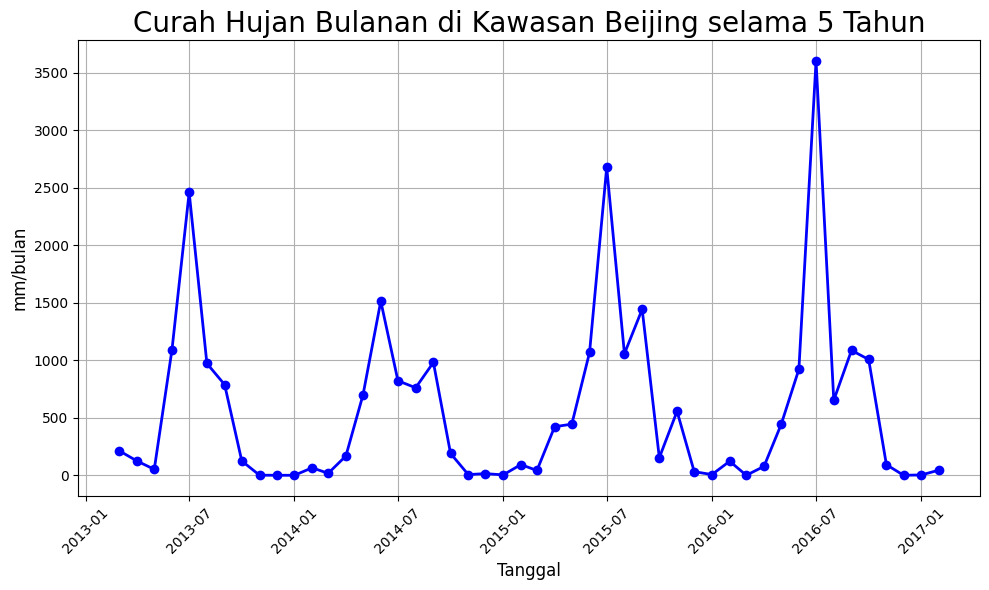

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(x, y1, marker='o', linewidth=2, label='Curah Hujan', color='blue')

plt.title("Curah Hujan Bulanan di Kawasan Beijing selama 5 Tahun", fontsize=20)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("mm/bulan", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Suhu Bulanan di Kawasan Beijing dalam Kurun Waktu 5 Tahun

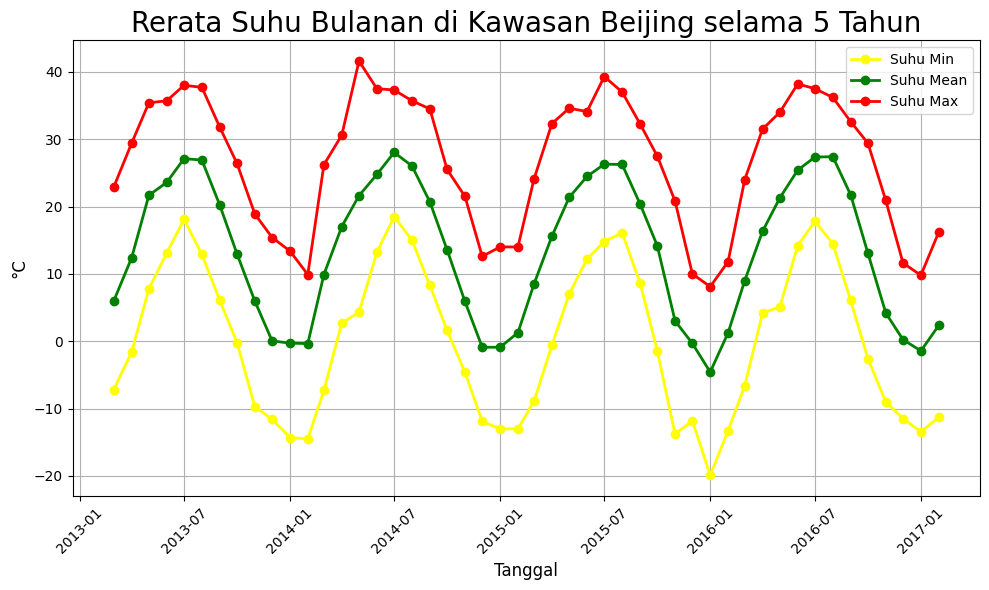

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(x, y2, marker='o', linewidth=2, label='Suhu Min', color='yellow')
plt.plot(x, y3, marker='o', linewidth=2, label='Suhu Mean', color='green')
plt.plot(x, y4, marker='o', linewidth=2, label='Suhu Max', color='red')

plt.title("Rerata Suhu Bulanan di Kawasan Beijing selama 5 Tahun", fontsize=20)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("°C", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Kelembapan Bulanan di Kawasan Beijing dalam Kurun Waktu 5 Tahun

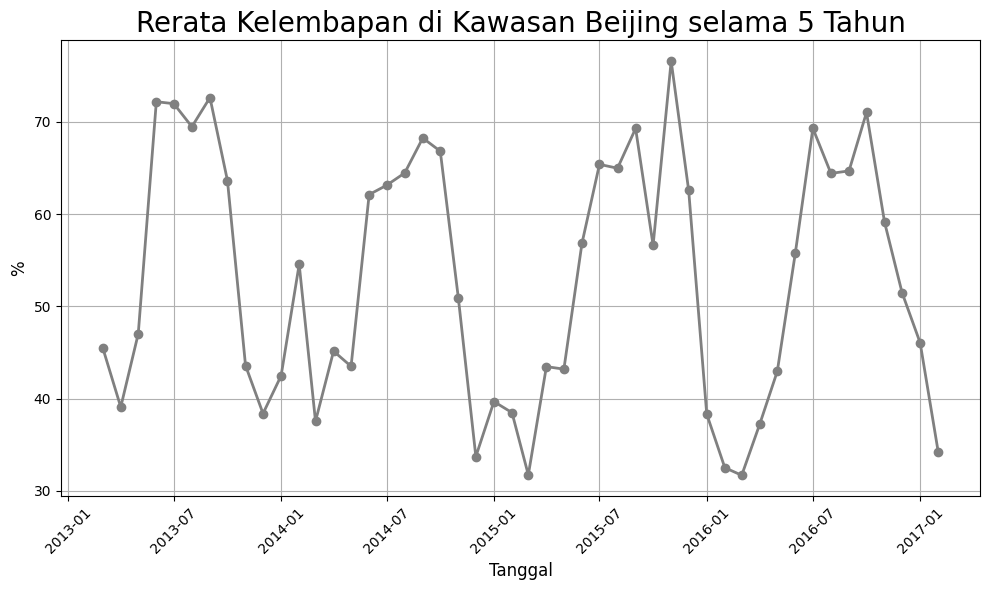

In [195]:
plt.figure(figsize=(10, 6))
plt.plot(x, y5, marker='o', linewidth=2, label='Kelembapan', color='gray')

plt.title("Rerata Kelembapan di Kawasan Beijing selama 5 Tahun", fontsize=20)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("%", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Tingkat Polusi Udara di Berbagai Stasiun

PM2.5                    PM10            
                    mean  min    max        mean  min    max
station                                                     
Aotizhongxin   82.540623  3.0  898.0  110.210033  2.0  984.0
Changping      70.986438  2.0  882.0   94.788575  2.0  999.0
Dingling       66.845557  3.0  881.0   84.113713  2.0  905.0
Dongsi         86.144243  3.0  737.0  110.347617  2.0  955.0
Guanyuan       82.897522  2.0  680.0  109.372349  2.0  999.0
Gucheng        84.074802  2.0  770.0  119.261567  2.0  994.0
Huairou        69.501747  2.0  762.0   92.422670  2.0  993.0
Nongzhanguan   85.079472  2.0  844.0  109.384022  2.0  995.0
Shunyi         79.437962  2.0  941.0   99.271936  2.0  999.0
Tiantan        82.033097  3.0  821.0  106.537076  2.0  988.0
Wanliu         83.467612  2.0  957.0  110.707858  2.0  951.0
Wanshouxigong  85.067548  3.0  999.0  112.505795  2.0  961.0